# Wikispeedia

## [Download worked project](../../_static/generated/wikispeedia-prj.zip) 

[Browse files online](https://github.com/DavidLeoni/softpython-en/tree/master/projects/wikispeedia)

What is the semantic distance between Batman and the Bible? [Wikispeedia](https://dlab.epfl.ch/wikispeedia/play/) is a fun game where you are given (or can choose) apparently unrelated source and a target Wikipedia pages, and you are asked to reach target page by only clicking links you find along the pages you visit. These click paths provide valuable information regarding human behaviour and the semantic connection between different topics, for example search engines might use such information to better understand user queries. You will analyze a dataset of such paths.

Data source: https://snap.stanford.edu/data/wikispeedia.html

- Robert West and Jure Leskovec: Human Wayfinding in Information Networks. 21st International World Wide Web Conference (WWW), 2012.
- Robert West, Joelle Pineau, and Doina Precup: Wikispeedia: An Online Game for Inferring Semantic Distances between Concepts. 21st International Joint Conference on Artificial Intelligence (IJCAI), 2009.

![expected-Batman-Bible-preview](expected-Batman-Bible-1.png)

<div class="alert alert-warning"> 
     
**REQUIREMENTS: Having read** [Relational data tutorial](https://en.softpython.org/relational/relational1-intro-sol.html#) **, which contains also instructions for installing required libraries.**
    
</div>    

## What to do

1. Unzip exercises zip in a folder, you should obtain something like this:

```
wikispeedia-prj
    wikispeedia.ipynb
    wikispeedia-sol.ipynb
    paths_finished.tsv
    soft.py
    jupman.py
```

<div class="alert alert-warning">

**WARNING: to correctly visualize the notebook, it MUST be in an unzipped folder !**
</div>

2. open Jupyter Notebook from that folder. Two things should open, first a console and then a browser. The browser should show a file list: navigate the list and open the notebook `wikispeedia.ipynb`

3. Go on reading the notebook, and write in the appropriate cells when asked

Shortcut keys:

- to execute Python code inside a Jupyter cell, press `Control + Enter`

- to execute Python code inside a Jupyter cell AND select next cell, press `Shift + Enter`

- to execute Python code inside a Jupyter cell AND a create a new cell aftwerwards, press `Alt + Enter`

- If the notebooks look stuck, try to select `Kernel -> Restart`

## The dataset

Each row of the dataset [paths_finished.tsv](paths_finished.tsv) is a user _session_, where user navigates from start page to end page. Columns are `hashedIpAddress`, `timestamp`, `durationInSec`, `path` and `rating`.

We define a **session group** as all sessions which have same start page and same end page, for example all these paths start with `Linguistics` and end in `Rome`:

In [1]:
import pandas as pd   
import numpy as np    
pd.options.display.max_colwidth = None
df = pd.read_csv('paths_finished.tsv', encoding='UTF-8', skiprows=16, header=None, sep='\t')
df[5890:5902]  

,0,1,2,3,4
5890,2f8c281d5e0b0e93,1248913182,106,Linguistics;Philosophy;Aristotle;Ancient_Greece;Italy;Rome,3.0
5891,389b67fa365b727a,1249604227,89,Linguistics;Language;English_language;Latin;Rome,2.0
5892,0299542414c3f20a,1257970576,94,Linguistics;Philosophy;Plato;Latin;Rome,NaN
5893,2b6e83d366a7514d,1260188882,113,Linguistics;Philosophy;Thomas_Aquinas;Italy;Rome,2.0
5894,0d57c8c57d75e2f5,1282028286,153,Linguistics;Language;Spanish_language;Vulgar_Latin;Roman_Empire;Rome,NaN
5895,0d57c8c57d75e2f5,1295244051,62,Linguistics;Philosophy;Socrates;Ancient_Greece;Ancient_Rome;Rome,1.0
5896,772843f73d9cf93d,1307880434,177,Linguistics;Language;German_language;Latin_alphabet;<;Italy;Rome,NaN
5897,654430d34a08a0f5,1339755238,81,Linguistics;Philosophy;Augustine_of_Hippo;Italy;Rome,2.0
5898,12470aee3d5ad152,1344167616,40,Linguistics;Philosophy;Plato;Italy;Rome,NaN
5899,6365b049395c53ce,1345421532,67,Linguistics;Culture;Ancient_Rome;Rome,1.0


In this other session group, all sessions start with `Pikachu` and end with `Sun`:

In [2]:
df[45121:45138]  

,0,1,2,3,4
45121,0d57c8c57d75e2f5,1278403914,17,Pikachu;North_America;Earth;Planet;Sun,1.0
45122,0d57c8c57d75e2f5,1278403938,42,Pikachu;Tree;Sunlight;Sun,NaN
45123,0d57c8c57d75e2f5,1278403972,17,Pikachu;Tree;Plant;<;Sunlight;Sun,1.0
45124,0d57c8c57d75e2f5,1278403991,8,Pikachu;Tree;Sunlight;Sun,NaN
45125,0d57c8c57d75e2f5,1278404007,9,Pikachu;Tree;Sunlight;Sun,1.0
45126,0d57c8c57d75e2f5,1278404048,8,Pikachu;Tree;Sunlight;Sun,NaN
45127,0d57c8c57d75e2f5,1278404061,16,Pikachu;Tree;Sunlight;Sun,NaN
45128,0d57c8c57d75e2f5,1278404065,8,Pikachu;Tree;Sunlight;Sun,NaN
45129,0d57c8c57d75e2f5,1278404070,8,Pikachu;Tree;Sunlight;Sun,NaN
45130,0d57c8c57d75e2f5,1278404089,8,Pikachu;Tree;Sunlight;Sun,NaN


## 1. filter_back

Whenever a user clicks the _Back_ button, she navigates back one page. This fact is tracked in the data by the presence of a `'<'` symbol. Write a function which RETURN a NEW path without pages which were navigated back. 

**NOTE:** **you can have duplicates** even without presence of `<`, because a user might end up to a previous page just by following circular links. 

**DO NOT** misuse search methods, I'm watching you   }:-[

In [3]:
def filter_back(path):
    
    ret = []    
    
    for page in path:        
        if page == '<':
            if len(ret) > 0:
                ret.pop()            
        else:    
            ret.append(page)    
    return ret
    

assert filter_back([]) == []
assert filter_back(['alfa']) == ['alfa']
assert filter_back(['beta','alfa','charlie']) == ['beta','alfa','charlie']

assert filter_back(['charlie', 'tango','<']) == ['charlie']
inp = ['charlie', 'tango','<']
assert filter_back(inp) == ['charlie']  # new
assert inp == ['charlie', 'tango','<']  
assert filter_back(['alfa', 'beta', 'charlie','<','<','delta']) == ['alfa','delta']
assert filter_back(['alfa', 'beta', 'charlie','delta','eagle','<','<','golf','<','<','hotel']) \
       == ['alfa','beta','hotel']

# circular paths
assert filter_back(['alfa','beta','alfa','alfa','beta']) ==  ['alfa','beta','alfa','alfa','beta']
assert filter_back(['alfa','beta','alfa','<','charlie','charlie','delta','charlie','<','charlie','delta']) \
       == ['alfa','beta','charlie','charlie','delta','charlie','delta']

In [3]:
def filter_back(path):
    raise Exception('TODO IMPLEMENT ME !')

assert filter_back([]) == []
assert filter_back(['alfa']) == ['alfa']
assert filter_back(['beta','alfa','charlie']) == ['beta','alfa','charlie']

assert filter_back(['charlie', 'tango','<']) == ['charlie']
inp = ['charlie', 'tango','<']
assert filter_back(inp) == ['charlie']  # new
assert inp == ['charlie', 'tango','<']  
assert filter_back(['alfa', 'beta', 'charlie','<','<','delta']) == ['alfa','delta']
assert filter_back(['alfa', 'beta', 'charlie','delta','eagle','<','<','golf','<','<','hotel']) \
       == ['alfa','beta','hotel']

# circular paths
assert filter_back(['alfa','beta','alfa','alfa','beta']) ==  ['alfa','beta','alfa','alfa','beta']
assert filter_back(['alfa','beta','alfa','<','charlie','charlie','delta','charlie','<','charlie','delta']) \
       == ['alfa','beta','charlie','charlie','delta','charlie','delta']

## 2. load_db

Load the **tab**-separated file [paths_finished.tsv](paths_finished.tsv) with a CSV Reader. The file has some rows to skip and no column names:  parse it and RETURN a list of dictionaries, with `hashedIpAddress`, `timestamp`, `durationInSec`, `path` and `rating` as fields:

- `path`: convert it with `filter_back` function
- `timestamp` and `durationInSec`: convert to integer
- `rating`: convert to integer, if `NULL`, set it to `None`

**Example**:

```python
>>> sessions_db = load_db('paths_finished.tsv')

Parsed 51318 sessions

>>> sessions_db[:2]

[{'hashedIpAddress': '6a3701d319fc3754',
  'timestamp': 1297740409,
  'durationInSec': 166,
  'path': ['14th_century',
   '15th_century',
   '16th_century',
   'Pacific_Ocean',
   'Atlantic_Ocean',
   'Accra',
   'Africa',
   'Atlantic_slave_trade',
   'African_slave_trade'],
  'rating': None},
 {'hashedIpAddress': '3824310e536af032',
  'timestamp': 1344753412,
  'durationInSec': 88,
  'path': ['14th_century',
   'Europe',
   'Africa',
   'Atlantic_slave_trade',
   'African_slave_trade'],
  'rating': 3}]
```

In [4]:

import csv

def load_db(filename):
    
   
    
    with open(filename, encoding='utf-8', newline='') as f:        
        my_reader = csv.reader(f, delimiter='\t')                
        
        ret = []                        
        
        for row in my_reader:
            if len(row) < 2:
                continue

            ses = { "hashedIpAddress": row[0],
                    "timestamp" : int(row[1]),
                    "durationInSec" : int(row[2]),
                    "path" : filter_back(row[3].split(';')),
                    "rating": int(row[4]) if row[4] != 'NULL' else None
            }
            
            ret.append(ses)

        print('Parsed', len(ret), 'sessions')
        
        return ret
    
    
sessions_db = load_db('paths_finished.tsv')

sessions_db[:2]

Parsed 51318 sessions


[{'hashedIpAddress': '6a3701d319fc3754',
  'timestamp': 1297740409,
  'durationInSec': 166,
  'path': ['14th_century',
   '15th_century',
   '16th_century',
   'Pacific_Ocean',
   'Atlantic_Ocean',
   'Accra',
   'Africa',
   'Atlantic_slave_trade',
   'African_slave_trade'],
  'rating': None},
 {'hashedIpAddress': '3824310e536af032',
  'timestamp': 1344753412,
  'durationInSec': 88,
  'path': ['14th_century',
   'Europe',
   'Africa',
   'Atlantic_slave_trade',
   'African_slave_trade'],
  'rating': 3}]

In [4]:

import csv

def load_db(filename):
    raise Exception('TODO IMPLEMENT ME !')
    
sessions_db = load_db('paths_finished.tsv')

sessions_db[:2]

In [5]:
# TESTING
from pprint import pprint
from expected_db import expected_db
for i in range(len(expected_db)):
    if expected_db[i] != sessions_db[i]:
        print('\nERROR at index', i, ':')
        print('  ACTUAL:')
        pprint(sessions_db[i])
        print('  EXPECTED:')
        pprint(expected_db[i])
        break        
if len(sessions_db) != len(expected_db):
    print("ERROR: different lengths! sessions_db:", len(sessions_db), "expected_db", len(expected_db))

## 3. calc_stats

Write a function which takes the sessions db and RETURN a NEW dictionary which maps sessions groups expressed as tuples (start, end) to a dictionary of statistics about them

- dictionary key: tuple with start,end page
- `sessions`: the number of sessions in that group
- `avg_len`: the average length (as number of edges) of all paths in the group 
- `pages`: the total number of **DISTINCT** pages found among all sessions in that group
- `freqs`: a dictionary which maps edges found in all sessions of that group to their count
- `max_freq`: the highest count among all freqs

**Output example** (for complete output see [expected_stats_db.py](expected_stats_db.py)):

```python
>>> calc_stats(sessions_db)
{
    ('Linguistics', 'Rome'): {'avg_len': 4.166666666666667,
                              'freqs': { ('Ancient_Greece', 'Ancient_Rome'): 1,
                                         ('Ancient_Greece', 'Italy'): 1,
                                         ('Ancient_Rome', 'Rome'): 2,
                                         ('Aristotle', 'Ancient_Greece'): 1,
                                         ('Augustine_of_Hippo', 'Italy'): 1,
                                         ('Culture', 'Ancient_Rome'): 1,
                                         ('English_language', 'Latin'): 3,
                                         ('German_language', 'Italy'): 1,
                                         ('Italy', 'Rome'): 5,
                                         ('Language', 'English_language'): 3,
                                         ('Language', 'German_language'): 1,
                                         ('Language', 'Spanish_language'): 1,
                                         ('Latin', 'Rome'): 4,
                                         ('Linguistics', 'Culture'): 1,
                                         ('Linguistics', 'Language'): 5,
                                         ('Linguistics', 'Philosophy'): 6,
                                         ('Philosophy', 'Aristotle'): 1,
                                         ('Philosophy', 'Augustine_of_Hippo'): 1,
                                         ('Philosophy', 'Plato'): 2,
                                         ('Philosophy', 'Socrates'): 1,
                                         ('Philosophy', 'Thomas_Aquinas'): 1,
                                         ('Plato', 'Italy'): 1,
                                         ('Plato', 'Latin'): 1,
                                         ('Roman_Empire', 'Rome'): 1,
                                         ('Socrates', 'Ancient_Greece'): 1,
                                         ('Spanish_language', 'Vulgar_Latin'): 1,
                                         ('Thomas_Aquinas', 'Italy'): 1,
                                         ('Vulgar_Latin', 'Roman_Empire'): 1},
                           'max_freq': 6,
                           'pages': 19,
                           'sessions': 12},
     ('Pikachu', 'Sun'):   {'avg_len': 3.0588235294117645,
                            'freqs': {('Earth', 'Planet'): 1,
                                      ('North_America', 'Earth'): 1,
                                      ('Pikachu', 'North_America'): 1,
                                      ('Pikachu', 'Tree'): 16,
                                      ('Planet', 'Sun'): 1,
                                      ('Sunlight', 'Sun'): 16,
                                      ('Tree', 'Sunlight'): 16},
                            'max_freq': 16,
                            'pages': 7,
                            'sessions': 17},
    .
    .
    .
}
```

In [6]:
def calc_stats(sessions):
    
    ret = {}
    
    for session in sessions:
        path = session['path']
                                                                            
        t = (path[0], path[-1])
        if t in ret:
            ret[t]['avg_len'] += len(path) - 1
            ret[t]['sessions'] += 1
            
            ret[t]['pages_set'].update(path)            
            
        else:    
            ret[t] = { 'avg_len' : len(path) - 1,
                       'sessions' : 1,
                       'pages_set' : set(path),                       
                       'freqs' : {}}
        
        freqs = ret[t]['freqs']
        
        for i in range(1, len(path)):            
            seg = tuple([path[i-1], path[i]])
            if seg in freqs:
                freqs[seg] += 1
            else:
                freqs[seg] = 1
        
    for t in ret:
        ret[t]['avg_len'] = ret[t]['avg_len'] / ret[t]['sessions']
        ret[t]['pages'] = len(ret[t]['pages_set'])        
        freq_vs = ret[t]['freqs'].values()
        ret[t]['max_freq'] = max(freq_vs) if len(freq_vs) > 0 else 0
        del ret[t]['pages_set']
        
    return ret
    
    
stats_db = calc_stats(sessions_db)



In [6]:
def calc_stats(sessions):
    raise Exception('TODO IMPLEMENT ME !')
    
stats_db = calc_stats(sessions_db)



In [7]:
# TESTING
from pprint import pprint
from expected_stats_db import expected_stats_db
for t in expected_stats_db:
    if not t in stats_db:
        print('\nERROR: missing key for session group', t)
        break
    elif expected_stats_db[t] != stats_db[t]:
        print('\nERROR at key for session group', t, ':')
        print('  ACTUAL:')
        pprint(stats_db[t])
        print('  EXPECTED:')
        pprint(expected_stats_db[t])
        break

diff = stats_db.keys() - expected_stats_db.keys()
if len(diff) > 0:
    print('ERROR! Found these extra keys in stats_db:', diff)

## 4. plot_network

Given a sessions group (start_page, target_page), we want to display the pages clicked by users for all its sessions. Since some sessions share edges, we will show their click frequency.

- Set edges attributes `'weight'`, `'label'` as $freq$, `'penwidth'` as $5 \large \frac{freq}{max\_freq}$ and `'color'` as `'#45daed'`
- Only display edges (and pages connected by such edges) for which the click count is _strictly greater_ than the given `threshold` 
- **NOTE:** when applying a threshold, it's fine if some nodes don't appear linked to either source or target

**Example 1**:

```python
>>> plot_network(stats_db,'Linguistics', 'Rome')
```

![expected-Linguistics-Rome-0.png](expected-Linguistics-Rome-0.png)

**Example 2**:
    
```python
>>> plot_network(stats_db, 'Batman', 'Bible', 0)  # default threshold zero, big graph
```

![expected-Batman-Bible-1.png](expected-Batman-Bible-1.png)

Image saved to file:  expected-Linguistics-Rome-0.png


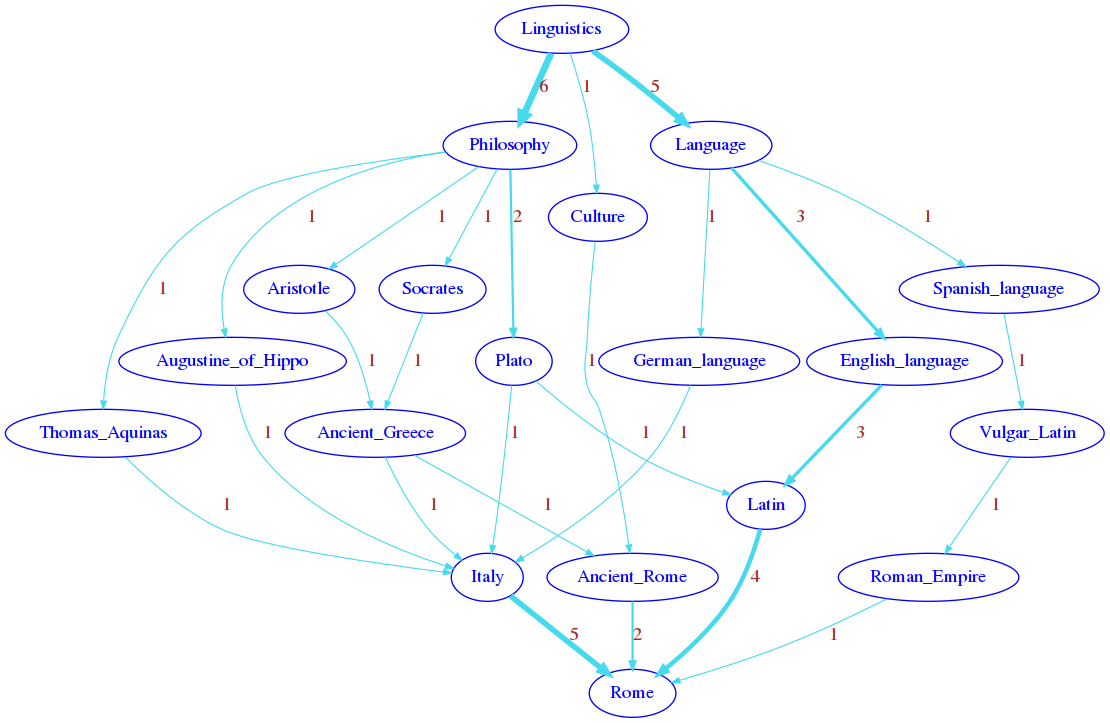

In [9]:

from soft import draw_nx
import networkx as nx

def plot_network(stats, source_page, target_page, threshold=0):
    
    
    G = nx.DiGraph()    
                        
    st = stats[(source_page, target_page)]    

    for p1,p2 in st['freqs']:
        
        d = st['freqs'][(p1,p2)]

        if d > threshold:

            G.add_node(p2)                
            G.add_edge(p1, p2)                    

            G[p1][p2]['weight'] = d
            G[p1][p2]['label'] = d
            G[p1][p2]['penwidth']= 5*d/st['max_freq']
            G[p1][p2]['color']= '#45daed'
            
    
    draw_nx(G
            
              )        
    
    
plot_network(stats_db,'Linguistics', 'Rome')

In [9]:

from soft import draw_nx
import networkx as nx

def plot_network(stats, source_page, target_page, threshold=0):
    raise Exception('TODO IMPLEMENT ME !')
    
plot_network(stats_db,'Linguistics', 'Rome')

In [10]:

plot_network(stats_db, 'Batman', 'Bible', 0)  # default threshold zero, big graph

In [11]:

plot_network(stats_db, 'Batman', 'Bible', 1)   # we take only edges > 1